In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv')
    subs = pd.read_csv('subscriptions_go.csv')

pd.set_option('display.max_columns', None)

In [3]:
users.info()
display(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [4]:
rides.info()
display(rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [5]:
subs.info()
display(subs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
users.isnull().sum()
users.duplicated().sum()
users = users.drop_duplicates()
users.duplicated().sum()
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [7]:
# users['city'].unique()
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [8]:
rides.isnull().sum()
rides.duplicated().sum()

0

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [10]:
subs.isnull().sum()
subs.duplicated().sum()

0

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


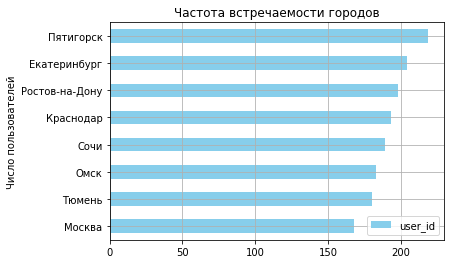

In [11]:
(users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
 .plot(
     kind='barh', 
     grid=True, 
     color='skyblue',
     title='Частота встречаемости городов',
     xlabel='Число пользователей',
     ylabel='Город'));
print(users['city'].value_counts())

free     835
ultra    699
Name: subscription_type, dtype: int64

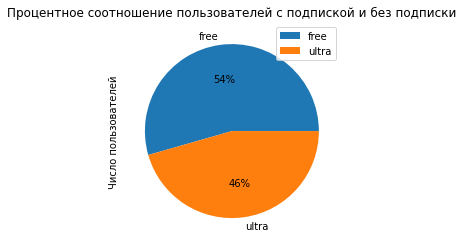

In [12]:
(users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
 .plot.pie(
     y='user_id', 
     label='Число пользователей',
     title = 'Процентное соотношение пользователей с подпиской и без подписки',
     autopct='%1.0f%%'));
users['subscription_type'].value_counts()

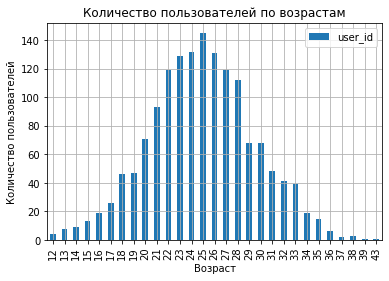

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [13]:
(users.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar', 
          grid=True )
)
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()
users['age'].describe()

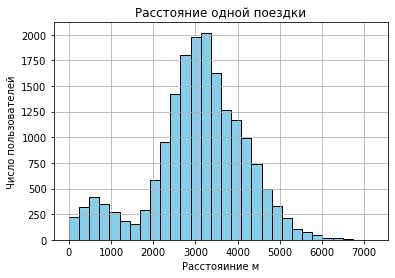

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [14]:
plt.hist(rides['distance'], bins=30, color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Расстояние одной поездки')
plt.xlabel('Расстояиние м')
plt.ylabel('Число пользователей')
plt.show()
rides['distance'].describe()

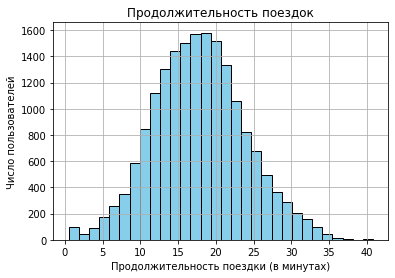

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [15]:
plt.hist(rides['duration'], bins=30, color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность поездки (в минутах)')
plt.ylabel('Число пользователей')
plt.show()
rides['duration'].describe()

In [16]:
data = users.merge(rides, on='user_id').merge(subs, on='subscription_type')
data.head()
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [17]:
free_subs = data[data['subscription_type'] == 'free']
free_subs.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


In [18]:
ultra_subs = data[data['subscription_type'] == 'ultra']
ultra_subs.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


In [19]:
print(f"Общее количество строк: {free_subs.shape[0] + ultra_subs.shape[0]}")

Общее количество строк: 18068


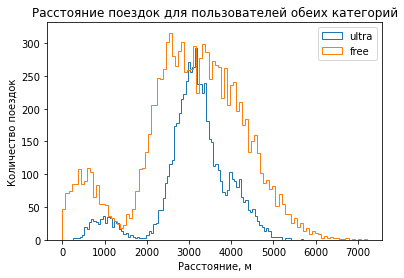

In [20]:
plt.hist(ultra_subs['distance'], bins=100, alpha=1, histtype='step',label='ultra')
plt.hist(free_subs['distance'], bins=100, alpha=1, histtype='step', label='free')
plt.title('Расстояние поездок для пользователей обеих категорий')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

In [21]:
ultra_subs['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [22]:
free_subs['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

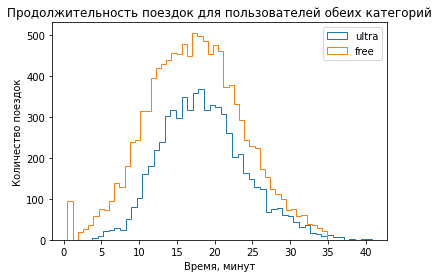

In [23]:
plt.hist(ultra_subs['duration'], bins=50, alpha=1, histtype='step',label='ultra')
plt.hist(free_subs['duration'], bins=50, alpha=1, histtype='step', label='free')
plt.title('Продолжительность поездок для пользователей обеих категорий')
plt.xlabel('Время, минут')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

In [24]:
ultra_subs['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [25]:
free_subs['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [27]:
data['duration'] = np.ceil(data['duration'])
data_agg = (data.pivot_table(index=['user_id', 'month'],
                            values=['city', 'subscription_type', 
                                    'distance', 'duration', 'date',
                                     'minute_price', 'start_ride_price', 
                                    'subscription_fee'],
                            aggfunc={'city': 'first', 
                                     'subscription_type': 'first',
                                     'distance': 'sum',
                                     'duration': 'sum',
                                     'date': 'count',
                                     'minute_price': 'first',
                                     'start_ride_price': 'first',
                                     'start_ride_price': 'first',
                                     'subscription_fee': 'first'}, fill_value=0)
            .rename(columns={'date': 'ride_count',
                            'distance': 'total_distance',
                            'duration': 'total_duration'}))

In [28]:
data_agg.head(10)

city  ride_count  total_distance  total_duration  \
user_id month                                                       
1       1      Тюмень           2     7027.511294              42   
        4      Тюмень           1      754.159807               7   
        8      Тюмень           2     6723.470560              46   
        10     Тюмень           2     5809.911100              32   
        11     Тюмень           3     7003.499363              56   
        12     Тюмень           2     6751.629942              28   
2       3        Омск           3    10187.723006              63   
        4        Омск           2     6164.381824              40   
        6        Омск           1     3255.338202              14   
        7        Омск           2     6780.722964              48   

               minute_price  start_ride_price  subscription_fee  \
user_id month                                                     
1       1                 6                 0               199   
        4                 6                 0               199   
        8                 6                 0               199   
        10                6                 0               199   
        11                6                 0               199   
        12                6                 0               199   
2       3                 6                 0               199   
        4                 6                 0               199   
        6                 6                 0               199   
        7                 6                 0               199   

              subscription_type  
user_id month                    
1       1                 ultra  
        4                 ultra  
        8                 ultra  
        10                ultra  
        11                ultra  
        12                ultra  
2       3                 ultra  
        4                 ultra  
        6                 ultra  
        7                 ultra

In [29]:
data_agg.isna().sum()

city                 0
ride_count           0
total_distance       0
total_duration       0
minute_price         0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

In [30]:
data_agg['revenue'] = (
    (data_agg['start_ride_price'] * data_agg['ride_count']) 
    + (data_agg['minute_price'] * data_agg['total_duration']) 
    + data_agg['subscription_fee']
)

In [31]:
data_agg['revenue'].sum()

3878641

In [32]:
data_agg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               11331 non-null  object 
 1   ride_count         11331 non-null  int64  
 2   total_distance     11331 non-null  float64
 3   total_duration     11331 non-null  int64  
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
 7   subscription_type  11331 non-null  object 
 8   revenue            11331 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 842.1+ KB


In [33]:
alpha = 0.05

results = st.ttest_ind(
    ultra_subs['duration'], 
    free_subs['duration'], 
    alternative='greater'
)

print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [34]:
alpha = 0.05

results = st.ttest_1samp(
    ultra_subs['distance'],
    3130, 
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [35]:
alpha = 0.05

revenue_ultra = data_agg[data_agg['subscription_type'] == 'ultra']['revenue']
revenue_free = data_agg[data_agg['subscription_type'] == 'free']['revenue']

results = st.ttest_ind(
    revenue_ultra, 
    revenue_free, 
    alternative='greater'
)

print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу
